In [156]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

''' Provides an abstraction of a data point as a Euclidean point with (x,y) coordinates. '''
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __str__(self):
        return '(' + str(self.x) + ',' + str(self.y) + ')'
    
    def __repr__(self):
        return self.__str__()
    
    ''' Returns the point in the given list that is closest (in terms of Euclidean distance) to this point. '''
    def closest_point(self, points):
        shortest_dist = float('inf')
        closest_point = 0
        for point in points:
            dist = math.sqrt((point.x - self.x)**2 + (point.y - self.y)**2)
            if dist < shortest_dist:
                shortest_dist = dist
                closest_point = point
        return closest_point

In [157]:
''' Returns the point that is closest to the average of the given list of Point objects. '''
def average_point(points):
    avg_x = 0.
    avg_y = 0.
    for point in points:
        avg_x += point.x
        avg_y += point.y
    avg_x /= len(points)
    avg_y /= len(points)
    
    avgPt = Point(avg_x, avg_y)
    closestToAvg = avgPt.closest_point(points)
    return closestToAvg

In [158]:
''' Creates a scatter plot of the given list of points, highlighting the centroids in red. '''
def plot_clusters(points, clusters):
    colors = ['blue', 'green', 'cyan', 'magenta', 'yellow', 'black']
    centroids = clusters.keys()
    
    for point in points:
        if point in centroids:
            plt.scatter(point.x, point.y, color='red')
        else:
            for centroid in clusters:
                if point in clusters[centroid]:
                    colorInd = centroids.index(centroid)
            plt.scatter(point.x, point.y, color=colors[colorInd])
    plt.show()

In [159]:
def k_means(points, k):
    # Initialize the centroids by randomly choosing k points from the dataset
    centroids = random.sample(points, k)
    previous_centroids = []
    
    # Assign clusters and reassign centroids until they stop changing
    while centroids != previous_centroids:
        previous_centroids = [cent for cent in centroids]
        clusters = {cent: [cent] for cent in centroids}
        
        # Assign each point to the closest centroid
        for point in points:
            if point not in centroids:
                # Find the centroid closest to the point and add it to its cluster
                closest_cent = point.closest_point(centroids)
                clusters[closest_cent].append(point)
                
        # Plot the current clusters
        plot_clusters(points, clusters)
                
        # Keep track of the previous set of centroids
        last_centroids = centroids

        # Reassign centroids 
        for centroid in clusters:
            centroids.append(average_point(clusters[centroid]))    # Assign the new centroid
            centroids.remove(centroid)    # Delete the old centroid

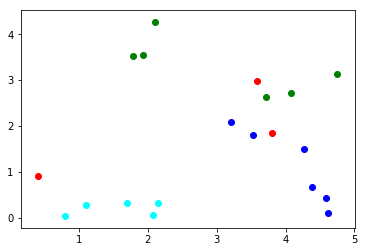

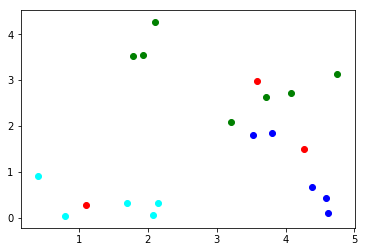

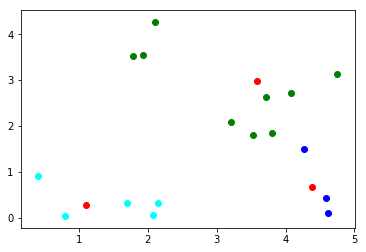

In [160]:
mList = [Point(round(np.random.uniform(0,5), 2), round(np.random.uniform(0,5), 2)) for i in range(20)]
k_means(mList, 3)